In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time 
from astropy.io import fits
from astropy.visualization.stretch import SinhStretch, AsinhStretch, LinearStretch, HistEqStretch, LogStretch

from astropy.visualization import (MinMaxInterval, SqrtStretch,
                                   ImageNormalize, ZScaleInterval, simple_norm)

from astropy.stats import sigma_clipped_stats
from photutils.aperture import CircularAperture, aperture_photometry

import os
import glob 

from astropy.time import Time
from photutils.detection import DAOStarFinder

from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.nddata import CCDData
from astropy import units as u

import matplotlib.dates as mdates

# fits_image_filename_bias = "C:/Users/Ohh no need to thank/OneDrive/Desktop/3070/TOI/TOI1461.1bRed_Bias 00000001.fit"
# fits_image_filename_dark = "C:/Users/Ohh no need to thank/OneDrive/Desktop/3070/TOI/TOI1461.1bRed_Dark00001139.fit"
# hdul1 = fits.open(fits_image_filename_bias)
# hdul2 = fits.open(fits_image_filename_dark)
# hdul1.info()
# hdul2.info()

# Average Darks, Flats and Bias

In [10]:

# Finding the average bias
# set arrays to zeros
avg_bias = np.zeros((1023,1536))
folder_Bias = 'C:/Users/Ohh no need to thank/OneDrive/Desktop/3070/TOI/Bias'

# os.listdir() method gets the files and directory present in a given path
# get files in the current directory using os.listdir()
for filename in os.listdir(folder_Bias):
    # use os.path.join to join various path components
    infilename = os.path.join(folder_Bias,filename)
    # getting the fits data 
    bias_data = fits. getdata(infilename, ext=0)
    # run the average of the array elements 
    avg_bias=np.mean(np.array([avg_bias, bias_data]), axis=0)
    
    
# Finding average flats
avg_flats = np.zeros((1023,1536))
folder_Flats = 'C:/Users/Ohh no need to thank/OneDrive/Desktop/3070/TOI/Flats'

for filename in os.listdir(folder_Flats):
    # use os.path.join to join various path components
    infilename = os.path.join(folder_Flats,filename)
    # getting the fits data 
    flats_data = fits. getdata(infilename, ext=0)
    # run the average of the array elements 
    avg_flats=np.mean(np.array([avg_flats, flats_data]), axis=0)
    
# Normalizing the flats 
norm_flats = avg_flats/np.max(avg_flats)

# Finding average darks
avg_darks = np.zeros((1023,1536))
folder_Darks = 'C:/Users/Ohh no need to thank/OneDrive/Desktop/3070/TOI/Darks'

for filename in os.listdir(folder_Darks):
    # use os.path.join to join various path components
    infilename = os.path.join(folder_Darks,filename)
    # getting the fits data 
    darks_data = fits. getdata(infilename, ext=0)
    # run the average of the array elements 
    avg_darks=np.mean(np.array([avg_darks, darks_data]), axis=0)
    






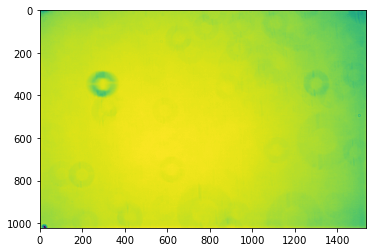

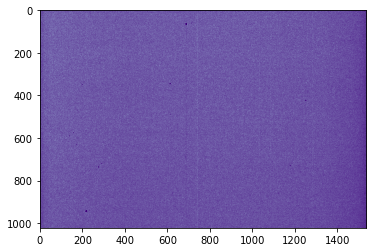

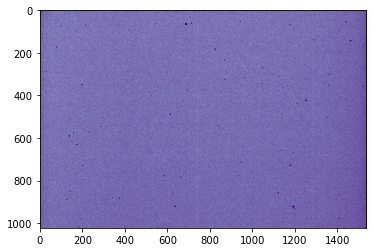

In [3]:
interval = ZScaleInterval()

plt.figure(1)
vmin, vmax = interval.get_limits(norm_flats)
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=AsinhStretch())
plt.imshow(norm_flats,cmap='viridis', norm=norm)
plt.figure(2)
vmin, vmax = interval.get_limits(avg_bias)
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=AsinhStretch())
plt.imshow(avg_bias,cmap='Purples', norm=norm)
plt.figure(3)
vmin, vmax = interval.get_limits(avg_darks)
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=AsinhStretch())
plt.imshow(avg_darks,cmap='Purples', norm=norm)




# Subtracting and dividing lights 

In [4]:
folder_lights = 'C:/Users/Ohh no need to thank/OneDrive/Desktop/3070/TOI/lights'
calibrated = []
timestr = []


# looping each lights for subtraction 
# getting files from the current directory
for filename in os.listdir(folder_lights):# processes only first 5 images
    # join various path components
    infilename = os.path.join(folder_lights, filename)
    # Getting the fits data 
    lights_data = fits.getdata(infilename, ext=0)
    timestr.append(CCDData.read(infilename, unit=u.dimensionless_unscaled).header['DATE-OBS'])
    # subtracting average bias from light 
    lights_subtract = np.subtract(lights_data, avg_bias)
    # dividing light with average flat field
    light_divide=np.divide(lights_subtract, norm_flats)
    calibrated.append(light_divide)
    

times =Time(timestr, format='fits')

# time is number of lights times exposure time 

''' 
read in lights and times and calibrate lights
'''


' \nread in lights and times and calibrate lights\n'

In [5]:
print(len(calibrated))
print(len(times))

537
537


In [6]:

# for i in range(len(calibrated)):
#     plt.figure(i, figsize = (10, 10))
#     interval = ZScaleInterval()
#     vmin, vmax = interval.get_limits(calibrated[i])
#     norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=AsinhStretch())
#     # calibrated data
#     plt.imshow(calibrated[i], cmap='viridis', norm=norm)
#     mean, median, std = sigma_clipped_stats(calibrated[i], sigma=3.0)
#     daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
#     sources = daofind(calibrated[i])  
# #     for col in sources.colnames:  
# #         sources[col].info.format = '%.8g'  # for consistent table output
# #     print(sources) 
# #     print(sources.colnames)
#     positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
#     apertures = CircularAperture(positions, r=10)
#     apertures.plot(color='blue', lw=1.5, alpha=0.25)
#     plt.show()
    

In [7]:
'''
save image to solve with astrometry
'''
# CCDData(calibrated[0], unit=u.dimensionless_unscaled).write('2solve.fits')

'\nsave image to solve with astrometry\n'

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 22.2238776597  35.7978659725  
CRPIX : 650.791127205  397.192985535  
CD1_1 CD1_2  : -8.47081253566e-05  0.000150511427433  
CD2_1 CD2_2  : 0.000150426898577  8.46564324047e-05  
NAXIS : 0  0
pixels:  (array(959.40033731), array(636.39970092))
pixels:  (array(1095.40255032), array(306.0001079))
pixels:  (array(523.36881374), array(308.17074709))
images:  537


'\nplot of first and last image, showing stars and their background apertures\n'

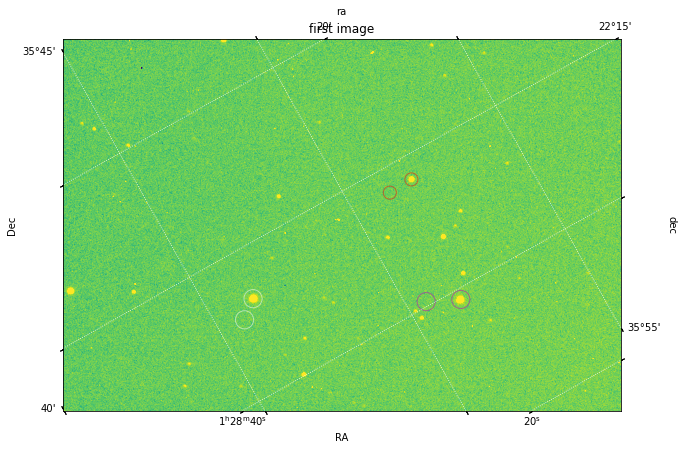

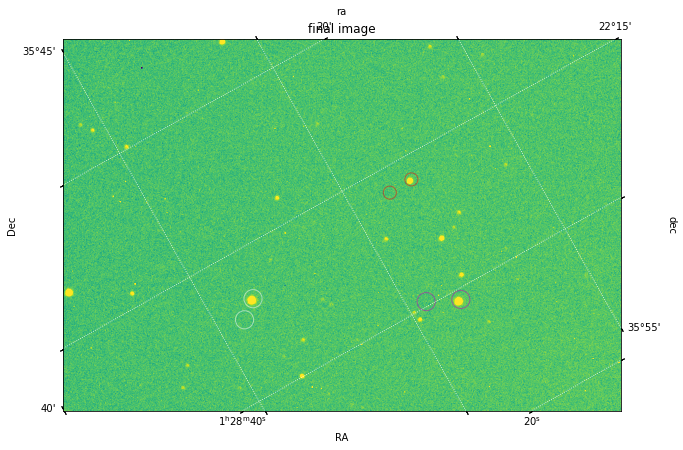

In [8]:

solved = CCDData.read('solved.fits', unit=u.dimensionless_unscaled)
hdulist = fits.open('wcs.fits')  
hdu = hdulist[0] 
# wcs_im = CCDData.read('wcs.fits', unit=u.dimensionless_unscaled)

wcs= WCS(hdu.header)
# first image
fig = plt.figure(figsize=(10, 10))
interval = ZScaleInterval()
vmin, vmax = interval.get_limits(solved.data)
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=AsinhStretch())
ax = plt.subplot(projection=wcs)
plt.imshow(solved.data, origin='lower', cmap='viridis', aspect='equal', norm=norm)
plt.xlabel(r'RA')
plt.ylabel(r'Dec')
print(wcs)
overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')

# target star
coord = SkyCoord('01h28m56.69s +35d51m53s', frame='icrs')
pixels = wcs.world_to_pixel(coord) 
print('pixels: ', pixels)
bkg_pix = [900, 600]
aperture = CircularAperture([pixels, bkg_pix], r=18)
aperture.plot(color='r', lw=1, alpha=0.5)

# reference star
coord_ref = SkyCoord('01h28m38.53s +35d51m26s', frame='icrs')
pixels_ref = wcs.world_to_pixel(coord_ref) 
print('pixels: ', pixels_ref)
bkg_pix_2 = [1000, 300]
aperture_ref = CircularAperture([pixels_ref, bkg_pix_2], r=25)
aperture_ref.plot(color='m', lw=1, alpha=0.5)

# reference star 2
coord_ref2 = SkyCoord('01h28m52.98s +35d46m17s', frame='icrs')
pixels_ref2 = wcs.world_to_pixel(coord_ref2) 
print('pixels: ', pixels_ref2)
bkg_pix_3 = [500, 250]
aperture_ref2 = CircularAperture([pixels_ref2, bkg_pix_3], r=25)
aperture_ref2.plot(color='w', lw=1, alpha=0.5)
plt.title('first image')

# last image
fig = plt.figure(figsize=(10, 10))
interval = ZScaleInterval()
vmin, vmax = interval.get_limits(calibrated[-1])
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=AsinhStretch())
ax = plt.subplot(projection=wcs)
plt.imshow(calibrated[-1], origin='lower', cmap='viridis', aspect='equal', norm=norm)
plt.xlabel(r'RA')
plt.ylabel(r'Dec')
plt.title('final image')
overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')
aperture.plot(color='r', lw=1, alpha=0.5)
aperture_ref.plot(color='m', lw=1, alpha=0.5)
aperture_ref2.plot(color='w', lw=1, alpha=0.5)
print('images: ', len(calibrated))

'''
plot of first and last image, showing stars and their background apertures
'''



In [24]:

aps = [aperture, aperture_ref, aperture_ref2]
t =[]
exp = 4.0

def perform_app(images, ap):
    '''
    feed a series of images and an aperture corresponding to a star
    and it will return a table containing the photometry results
    for that aperture for each frame as a row.
    '''
    phot_all = Table(names = ('time', 'aperture_sum'))
    for i in range(len(images)):
        im = images[i]
        ti = times[i]
        #print(ti)
        phot_table = aperture_photometry(im, ap)
        phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
        # aperture sum of star minus aperture sum of background
        ap_sum = float(phot_table['aperture_sum'][0] - phot_table['aperture_sum'][1])
        phot_all.add_row([ti.sec, ap_sum])
    return phot_all
phot = []
for ap in aps:
    phot.append(perform_app(calibrated, ap))
    print(len(phot))

    
import time
t =[]
exp = 4
filename = 'C:/Users/Ohh no need to thank/OneDrive/Desktop/3070/TOI/lights'
for i in filename:
    t.append

1
2
3


TypeError: 'builtin_function_or_method' object is not subscriptable

# Normalize Flux calculation 

'\nthis is a graph of the normalized flux of all three stars with respect to frame number\nthey all have the same sorta trend to them, but our reference stars are much brighter than our target\nthat brightness difference is not seen here due to the normalization\n\nyou can modify this to remove the normalization and see relative brightness\n'

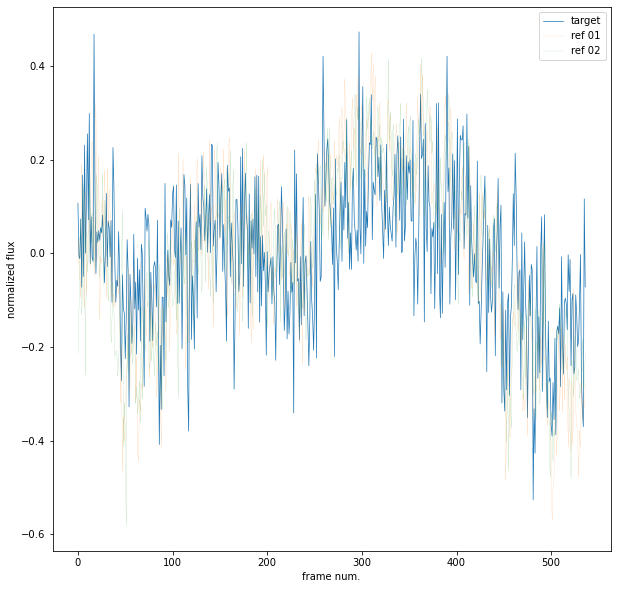

In [12]:
fig = plt.figure(figsize=(10, 10))
f = np.arange(len(phot[0]['time']))
p1 = (phot[0]['aperture_sum'] - np.mean(phot[0]['aperture_sum'])) / (np.max(phot[0]['aperture_sum']) - np.min(phot[0]['aperture_sum']))
p2 = (phot[1]['aperture_sum'] - np.mean(phot[1]['aperture_sum'])) / (np.max(phot[1]['aperture_sum']) - np.min(phot[1]['aperture_sum']))
p3 = (phot[2]['aperture_sum'] - np.mean(phot[2]['aperture_sum'])) / (np.max(phot[2]['aperture_sum']) - np.min(phot[2]['aperture_sum']))
plt.plot(f, p1, label = 'target', linewidth = 0.7)
plt.plot(f, p2, label = 'ref 01', linewidth = 0.1)
plt.plot(f, p3, label = 'ref 02', linewidth = 0.1)
plt.xlabel("frame num.")
plt.ylabel("normalized flux")
plt.legend()
'''
this is a graph of the normalized flux of all three stars with respect to frame number
they all have the same sorta trend to them, but our reference stars are much brighter than our target
that brightness difference is not seen here due to the normalization

you can modify this to remove the normalization and see relative brightness
'''

'\nthis is a mean subtracted plot of the differential light curve\nbetween our target and two reference stars. and the average \nof the two differential light curves. time is given in \nmodified julian date\n\nwe subtract the mean brightness to make all three curves center on the same brightness for comparison\n'

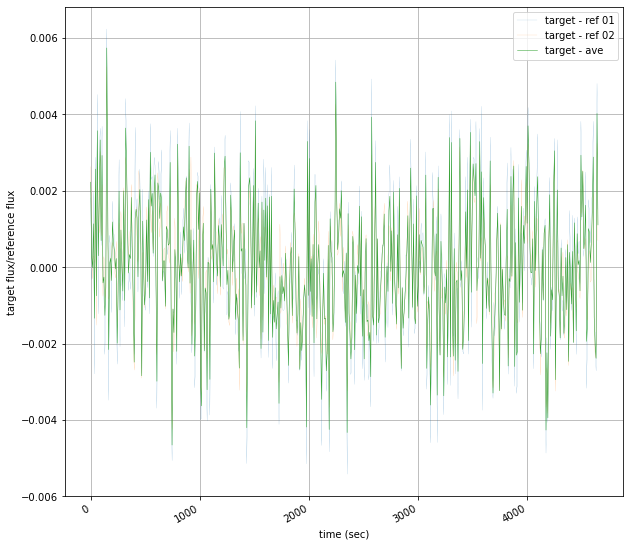

In [31]:

fig = plt.figure(figsize=(10, 10))
# off = ((-395000 + 415000) / 537)* f - 415000 
diff_1 = phot[0]['aperture_sum'] / phot[1]['aperture_sum']
diff_1 -= np.mean(diff_1)
diff_2 = phot[0]['aperture_sum'] / phot[2]['aperture_sum']
diff_2 -= np.mean(diff_2)
offset = (np.min(times.mjd)*u.d).to(u.s)
plt.plot((times.mjd*u.d).to(u.s) - offset, diff_1 , label = 'target - ref 01', linewidth = 0.1)
# plt.plot(times, off - off)
plt.plot((times.mjd*u.d).to(u.s)-offset, diff_2, label = 'target - ref 02', linewidth = 0.1)
plt.plot((times.mjd*u.d).to(u.s)-offset, np.mean([diff_1, diff_2], axis = 0), label = 'target - ave', linewidth = 0.5)

# formatting plot
fig.autofmt_xdate()
# plt.xlim = (np.min((times.mjd*u.d).to(u.s)), np.max((times.mjd*u.d).to(u.s)))
locator = mdates.AutoDateLocator(minticks=10, maxticks=30)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_minor_locator(locator)
plt.xlabel("time (sec)")
plt.ylabel("target flux/reference flux")
plt.legend()
plt.grid()
# plt.xlim = ((np.min(times.mjd), np.max(times.mjd)))

'''
this is a mean subtracted plot of the differential light curve
between our target and two reference stars. and the average 
of the two differential light curves. time is given in 
modified julian date

we subtract the mean brightness to make all three curves center on the same brightness for comparison
'''

In [ ]:
59873.085
2459873.585